In [9]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [10]:
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [16]:
data.value_counts()
df = data.value_counts()
df

Type  Alcohol  Malic  Ash   Alcalinity  Magnesium  Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  Color  Hue   Dilution  Proline
1     12.85    1.60   2.52  17.8        95         2.48     2.37        0.26           1.46             3.93   1.09  3.63      1015       1
3     12.36    3.83   2.38  21.0        88         2.30     0.92        0.50           1.04             7.65   0.56  1.58      520        1
2     12.60    1.34   1.90  18.5        88         1.45     1.36        0.29           1.35             2.45   1.04  2.77      562        1
      12.64    1.36   2.02  16.8        100        2.02     1.41        0.53           0.62             5.75   0.98  1.59      450        1
      12.67    0.98   2.24  18.0        99         2.20     1.94        0.30           1.46             2.62   1.23  3.16      450        1
                                                                                                                                         ..
      11.45    2.40   2.4

In [17]:
# Normalizing the numerical data
data_normal = scale(df)

In [18]:
data_normal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
pca = PCA()
pca_values = pca.fit_transform(data)

In [21]:
pca_values

array([[ 3.18564055e+02,  2.14907729e+01,  3.16461306e+00, ...,
         1.68878924e-01, -1.64297340e-02,  8.93553535e-02],
       [ 3.03098514e+02, -5.36608268e+00,  6.81699246e+00, ...,
         8.89334239e-02, -4.48448723e-02,  1.78962892e-02],
       [ 4.38062063e+02, -6.53798613e+00, -1.06671672e+00, ...,
         1.80875713e-01, -5.03578282e-02, -3.94205943e-02],
       ...,
       [ 8.84563102e+01,  1.87796442e+01, -2.42312742e+00, ...,
        -2.09746486e-01,  8.53365516e-02,  3.43716469e-02],
       [ 9.34544723e+01,  1.86741801e+01, -1.95877509e+00, ...,
        -3.22197611e-04, -4.65644908e-02,  1.36469328e-01],
       [-1.86944619e+02, -2.11062888e-01, -5.73392038e+00, ...,
         3.92954136e-02,  1.60191386e-02,  1.97873108e-02]])

In [22]:
pca = PCA(n_components = 5)
pca_values = pca.fit_transform(data)

In [23]:
pca_values

array([[ 3.18564055e+02,  2.14907729e+01,  3.16461306e+00,
        -2.60165816e-01,  7.52091943e-01],
       [ 3.03098514e+02, -5.36608268e+00,  6.81699246e+00,
        -1.00497751e+00, -5.01045377e-01],
       [ 4.38062063e+02, -6.53798613e+00, -1.06671672e+00,
         9.77726666e-01,  4.53208097e-01],
       [ 7.33240711e+02,  1.93319951e-01, -9.38312300e-01,
        -5.25348857e-01,  8.79918042e-01],
       [-1.15699516e+01,  1.84872549e+01, -4.24917332e-01,
         1.51882323e+00,  5.06733142e-01],
       [ 7.03231800e+02, -3.31723191e-01,  9.22964109e-01,
        -4.07349276e-01,  1.13319947e-01],
       [ 5.42972384e+02, -1.35191971e+01,  2.12077648e+00,
        -7.37765907e-03, -5.04537861e-01],
       [ 5.48402656e+02,  1.14491475e+01,  7.17177590e-02,
         1.34225532e+00, -8.61214605e-01],
       [ 2.98037964e+02, -8.18149185e+00,  3.89306597e+00,
        -9.49011409e-01,  3.78462220e-01],
       [ 2.98050654e+02, -7.10283985e+00,  1.57388714e+00,
        -1.62300075e+00

In [24]:
var = pca.explained_variance_ratio_
var

array([9.98087625e-01, 1.73591851e-03, 9.58948998e-05, 5.13200714e-05,
       1.29365230e-05])

In [31]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  ])

In [32]:
pca.components_

array([[-1.55934284e-03,  1.65926191e-03, -6.81019030e-04,
         1.94905197e-04, -4.67130461e-03,  1.78679787e-02,
         9.89831553e-04,  1.56729290e-03, -1.23086954e-04,
         6.00609082e-04,  2.32712720e-03,  1.71381131e-04,
         7.04935892e-04,  9.99821721e-01],
       [ 2.77861762e-03,  1.20426744e-03,  2.15953126e-03,
         4.59399561e-03,  2.64607000e-02,  9.99339902e-01,
         8.74730944e-04, -5.86582556e-05, -1.35399415e-03,
         5.00222716e-03,  1.51142222e-02, -7.64042527e-04,
        -3.50068415e-03, -1.77693551e-02],
       [-1.00919962e-01, -1.83035443e-02, -1.24559463e-01,
        -5.12928854e-02, -9.28099861e-01,  2.99845440e-02,
         4.27611042e-02,  9.02671155e-02, -1.37215147e-02,
         2.62371281e-02, -3.03202978e-01,  2.69922728e-02,
         7.43661999e-02, -4.62655971e-03],
       [-1.47645845e-01, -1.36988601e-01, -1.56739376e-01,
         1.20471220e-02,  3.56990103e-01,  4.75411673e-03,
         7.64520642e-02,  1.72191025e-01, -1.

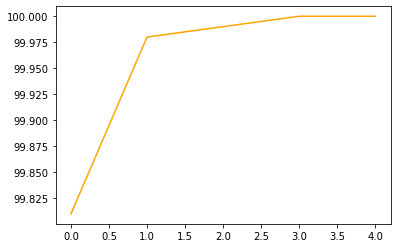

In [33]:
plt.plot(var1,color="orange")

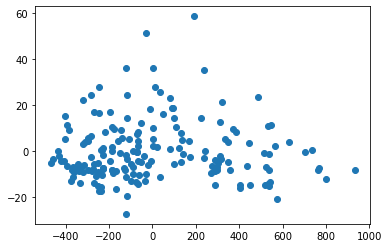

In [34]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y)

# hierarchy

In [35]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

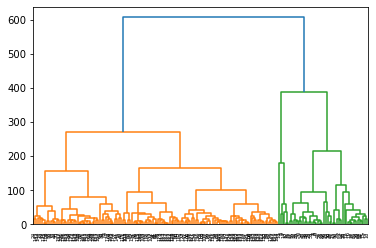

In [36]:
dendrogram = sch.dendrogram(sch.linkage(data,method = 'average'))

In [37]:
hc = AgglomerativeClustering(n_clusters=3,affinity = 'euclidean',linkage = 'average')

In [40]:
y_hc = hc.fit_predict(data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [41]:
data['h_clusterid']=Clusters
data.sort_values("h_clusterid")

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
88,2,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,0
113,2,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434,0
114,2,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385,0
115,2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407,0
116,2,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,2
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
31,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515,2


# k-means

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,:])
from sklearn.cluster import KMeans

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


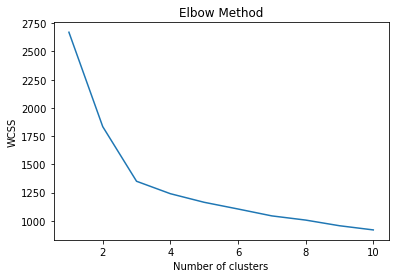

In [47]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=3, random_state=42)

In [50]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [51]:
data['clusterid_new'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[ 1.34745816,  0.18654314,  0.90497145,  0.24921026,  0.58370348,
        -0.05063539, -0.988557  , -1.23619475,  0.71684172, -0.74960756,
         0.98849829, -1.19129878, -1.30153966, -0.38004461, -0.57459816],
       [-1.17081351,  0.8878039 , -0.33424336,  0.32891908, -0.66561486,
         0.57048997,  0.88190348,  0.94931446, -0.5897288 ,  0.58946147,
         0.17500777,  0.50184089,  0.77069651,  1.18120327,  1.13004304],
       [ 0.06120813, -0.90447605, -0.35201449, -0.46299199,  0.16428146,
        -0.46011976, -0.06485385,  0.05238659,  0.00374614,  0.01975481,
        -0.85415772,  0.4096114 ,  0.25411091, -0.75724653, -0.57459816]])

In [52]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,0.0
1,1,1.033333,13.719333,1.964000,2.456500,17.278333,107.866667,2.845500,2.974833,0.288667,1.927333,5.462667,1.071833,3.157333,1117.816667,0.9
2,2,1.985507,12.268406,1.944203,2.239855,20.042029,93.188406,2.254638,2.081449,0.362319,1.602174,3.083478,1.050812,2.791594,509.101449,0.0


In [56]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0


# inference

In [ ]:
Through elbow method we got that we have to do 3 clusters